In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from IPython.display import display,clear_output,HTML
from sklearn.metrics import accuracy_score,roc_auc_score,explained_variance_score,auc
import seaborn as sns # 数据可视化的包
import matplotlib.pyplot as plt
#显示所有列
pd.set_option('display.max_columns', None)

# read data

In [2]:
df_train = pd.read_csv('./lizhipredict_data/train.csv')
df_test = pd.read_csv('./lizhipredict_data/test.csv')
data_sample = pd.read_csv('./lizhipredict_data/sample.csv')

# EDA

In [3]:
len(df_train), len(df_test)

(1176, 294)

In [4]:
df_train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,4,Female,72,3,4,Manager,4,Married,17875,11761,4,Y,Yes,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,1066,3,Male,74,3,2,Sales Executive,1,Married,8396,22217,1,Y,No,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,789,1,Male,76,2,3,Sales Executive,1,Single,7587,14229,1,Y,No,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,3,Male,73,1,1,Sales Representative,4,Single,1118,8040,1,Y,Yes,14,3,4,80,0,1,4,3,1,0,1,0


In [5]:
df_train.describe()

,user_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000
mean,736.124150,36.805272,802.033163,9.159864,2.918367,1.0,1026.960034,2.750850,65.130102,2.724490,2.055272,2.732993,6458.690476,14247.159864,2.703231,15.152211,3.150510,2.714286,80.0,0.805272,11.161565,2.767007,2.764456,6.982143,4.19898,2.160714,4.098639
std,419.336964,9.065549,405.946729,8.137224,1.009809,0.0,594.763609,1.096221,20.294326,0.715027,1.106040,1.102477,4724.845883,7133.767499,2.521301,3.652543,0.357723,1.080583,0.0,0.865611,7.747576,1.250756,0.713251,6.094338,3.63124,3.208052,3.564190
min,0.000000,18.000000,104.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,374.750000,30.000000,463.500000,2.000000,2.000000,1.0,498.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2858.750000,7912.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,742.500000,36.000000,805.500000,7.000000,3.000000,1.0,1031.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4850.500000,14225.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1101.250000,42.250000,1162.000000,14.000000,4.000000,1.0,1555.250000,4.000000,82.250000,3.000000,3.000000,4.000000,8380.250000,20372.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [6]:
df_train.dtypes

user_id                      int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [7]:
df1 = df_train.isnull().sum()
df1

user_id                     0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

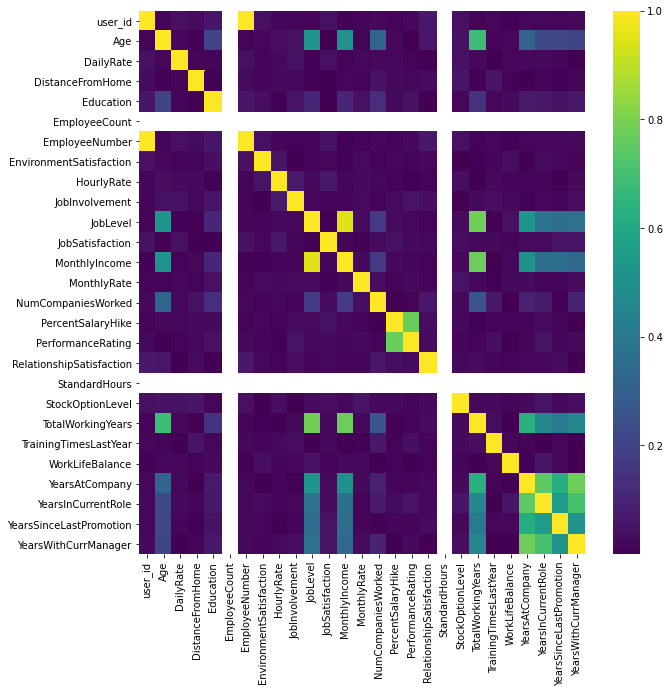

In [8]:
# HeatMap of Correlations
figure, ax = plt.subplots(figsize=(10, 10))
data = df_train.copy().corr() ** 2
#data = np.tril(data, k=-1)
data[data==0] = np.nan
sns.heatmap(np.sqrt(data), annot=False, cmap='viridis', ax=ax)
del data

# Preprocessing

In [9]:
X_numerical_cols = df_train.select_dtypes(include = 'int64').columns.values
print(X_numerical_cols)
X_category_cols = df_train.select_dtypes(include = 'object').columns.values
print(X_category_cols)

['user_id' 'Age' 'DailyRate' 'DistanceFromHome' 'Education'
 'EmployeeCount' 'EmployeeNumber' 'EnvironmentSatisfaction' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobSatisfaction' 'MonthlyIncome'
 'MonthlyRate' 'NumCompaniesWorked' 'PercentSalaryHike'
 'PerformanceRating' 'RelationshipSatisfaction' 'StandardHours'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'WorkLifeBalance' 'YearsAtCompany' 'YearsInCurrentRole'
 'YearsSinceLastPromotion' 'YearsWithCurrManager']
['Attrition' 'BusinessTravel' 'Department' 'EducationField' 'Gender'
 'JobRole' 'MaritalStatus' 'Over18' 'OverTime']


In [10]:
id_col = 'user_id'
y_col = 'Attrition'
# X_digital_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
#                 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
X_digital_cols = ['user_id','Age','DailyRate','DistanceFromHome','Education',
 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
 'MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
 'PerformanceRating','RelationshipSatisfaction','StandardHours',
 'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
 'YearsSinceLastPromotion','YearsWithCurrManager']

# X_categorical_cols = ['BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
#                 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
#                 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
#                 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
#                 'WorkLifeBalance']
X_categorical_cols = ['BusinessTravel','Department','EducationField','Gender',
                     'JobRole','MaritalStatus','Over18','OverTime',]
X_drop_cols = ['EmployeeNumber', 'Over18', 'StandardHours']   #std = 0

e:\python\python37\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


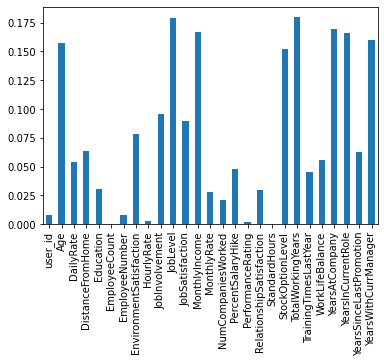

In [11]:
# # Correlation between vars and target¶
# data = df_train.corrwith(df_train['Attrition']).agg('square')
# data = data.drop('Attrition')
# figure, ax = plt.subplots(figsize=(10, 10))
# data.agg('sqrt').plot.bar(ax=ax)
# # del data
data = df_train.corrwith(df_train['Attrition'],method = 'kendall').agg('abs')
# data = data.drop('Attrition')
data.plot.bar()
# del data

In [12]:
X_drop_col2 = []
for i in data.index:
    if data[i]<0.02:
        X_drop_col2.append(i)
print(X_drop_col2)

['user_id', 'EmployeeNumber', 'HourlyRate', 'PerformanceRating']


In [13]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder          #处理digital_cols
sacalar = MinMaxScaler()
X_numerical_cols = [var for var in X_digital_cols if var not in X_drop_col2+X_drop_cols]
X_train_digital = sacalar.fit_transform(df_train[X_numerical_cols])
X_test_digital = sacalar.transform(df_test[X_numerical_cols])
df_train['Attrition'] = df_train['Attrition'].map(lambda x:1 if x=='Yes' else 0)   #因为attrition是yes or no 所以映射为1和0
Y = df_train['Attrition'].tolist()

In [14]:
X_train_digital.shape,X_test_digital.shape

((1176, 22), (294, 22))

In [15]:
le_list = []
OHenc_list = []
X_train_category, X_test_category = None, None

for i in [var for var in X_categorical_cols if var not in X_drop_col2+X_drop_cols]:     #选取类别列，剔除std为0的列
    le = LabelEncoder()

    
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.transform(df_test[i])
    OHenc = OneHotEncoder()
    OHtrain = OHenc.fit_transform(df_train[i].values.reshape(-1, 1)).todense()
    OHtest = OHenc.transform(df_test[i].values.reshape(-1,1)).todense()
    le_list.append(le)
    OHenc_list.append(OHenc)
    if X_train_category is None:
        X_train_category = OHtrain
        X_test_category = OHtest
    else:
        X_train_category = np.hstack((X_train_category, OHtrain))
        X_test_category = np.hstack((X_test_category, OHtest))

In [16]:
df_train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0,2,605,2,21,3,1,1,1938,4,0,72,3,4,3,4,1,17875,11761,4,Y,1,13,3,3,80,1,29,2,2,1,0,0,0
1,1092,45,0,2,950,1,28,3,5,1,1546,4,1,97,3,1,6,4,1,2132,4585,4,Y,0,20,4,4,80,1,8,3,3,5,4,0,3
2,768,40,0,2,300,2,26,3,2,1,1066,3,1,74,3,2,7,1,1,8396,22217,1,Y,0,14,3,2,80,1,8,3,2,7,7,7,5
3,569,36,0,0,1434,2,8,4,1,1,789,1,1,76,2,3,7,1,2,7587,14229,1,Y,0,15,3,2,80,0,10,1,3,10,7,0,9
4,911,25,1,1,599,2,24,1,1,1,1273,3,1,73,1,1,8,4,2,1118,8040,1,Y,1,14,3,4,80,0,1,4,3,1,0,1,0


In [17]:
X_train_category.shape

(1176, 28)

In [18]:
X_train_features = np.hstack((X_train_digital, X_train_category))
X_test_features = np.hstack((X_test_digital, X_test_category))

In [19]:
X_train_features.shape

(1176, 50)

In [20]:
X_train,X_val,y_train,y_val = train_test_split(X_train_features,Y,test_size=0.2, random_state=33)

In [21]:
[np.sum([i for i in Y if i ==1])]

[188]

In [22]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
predict = clf.predict(X_val)

In [23]:
accuracy_score(predict,y_val),roc_auc_score(predict,y_val)

(0.8983050847457628, 0.9069940476190476)

In [24]:
predict.shape

(236,)

In [25]:
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_features, Y)
predictions = clf.predict_proba(X_test_features)

In [26]:
predictions[1][0]

0.9099882998329434

In [27]:
sub = df_test[['user_id']].copy()
sub['Attrition'] = [predictions[i][1] for i in range(len(predictions))]
# sub['Attrition'] = sub['Attrition'].apply(lambda x: x if x >=0 else 0.0000)
sub.to_csv('submission.csv', index=False)